In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
#графики в svg выглядят более четкими
# %config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 9, 6
import pandas as pd

In [4]:
%matplotlib inline

In [5]:
df = pd.read_csv('data/video_games_sales.csv').dropna()
print(df.shape)

(6825, 16)


In [6]:
df['User_Score'] = df.User_Score.astype('float64')
df['Year_of_Release'] = df.Year_of_Release.astype('int64')
df['User_Count'] = df.User_Count.astype('int64')
df['Critic_Count'] = df.Critic_Count.astype('int64')

In [5]:
sales_df = df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']]
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 6 columns):
NA_Sales           6825 non-null float64
EU_Sales           6825 non-null float64
JP_Sales           6825 non-null float64
Other_Sales        6825 non-null float64
Global_Sales       6825 non-null float64
Year_of_Release    6825 non-null int64
dtypes: float64(5), int64(1)
memory usage: 373.2 KB


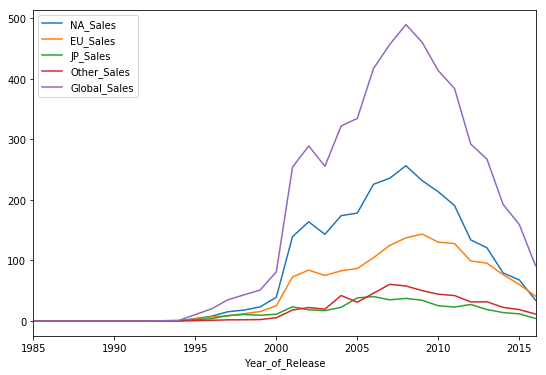

In [12]:
sales_df.groupby('Year_of_Release').sum().plot()

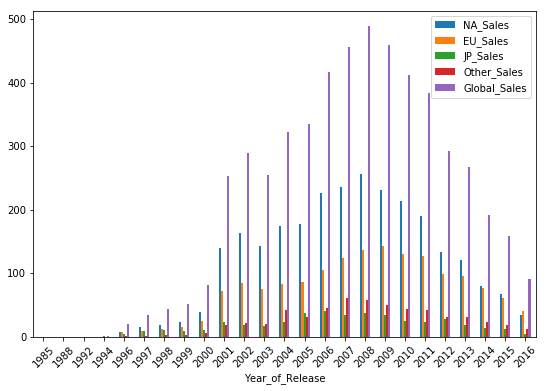

In [13]:
sales_df.groupby('Year_of_Release').sum().plot(kind='bar', rot=45)

In [14]:
cols = ['Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']
sns_plot = sns.pairplot(df[cols])
sns_plot.savefig('pairplot.png')

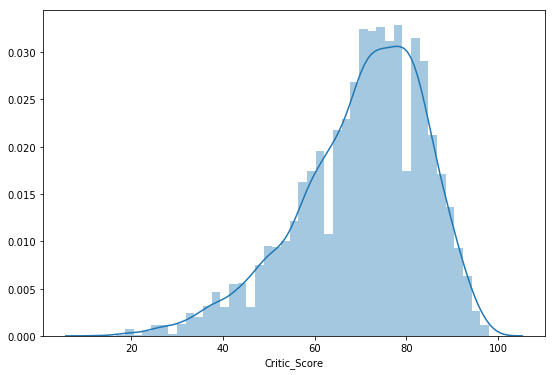

In [15]:
sns.distplot(df.Critic_Score)

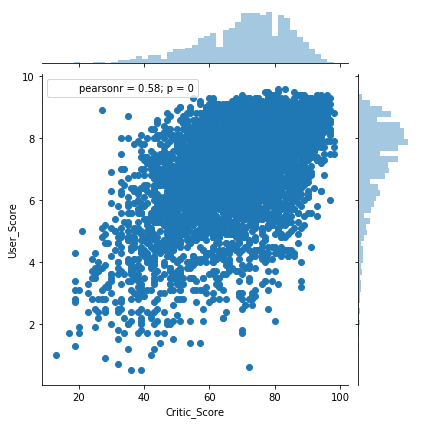

In [16]:
sns.jointplot(x='Critic_Score', y='User_Score', 
              data=df, kind='scatter')

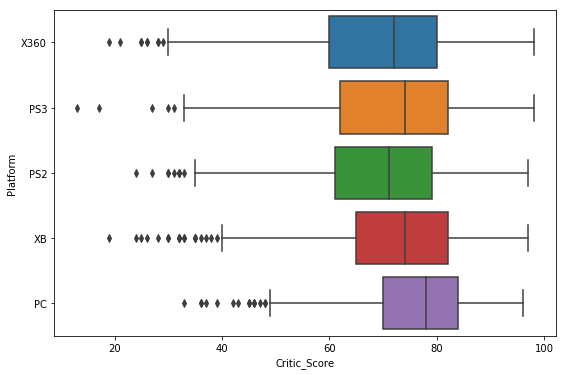

In [22]:
top_platforms = df.Platform.value_counts().sort_values(ascending = False).head(5).index.values
sns.boxplot(y="Platform", x="Critic_Score", data=df[df.Platform.isin(top_platforms)], orient="h")

In [19]:
df.Platform.value_counts().sort_values(ascending = False).head(5)

PS2     1140
X360     858
PS3      769
PC       651
XB       565
Name: Platform, dtype: int64

In [33]:
rcParams['figure.figsize'] = 9, 6
platform_genre_sales = df.pivot_table(
                        index='Platform', 
                        columns='Genre', 
                        values='Global_Sales', 
                        aggfunc=sum).fillna(0).applymap(float)
snspl=sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5)
# sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5)
fig=snspl.get_figure()
fig.savefig('heat.png')

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [34]:
platform_genre_sales

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
3DS,30.81,2.00,2.63,4.48,27.61,2.63,13.89,18.94,1.02,16.08,2.20,0.94
DC,0.00,1.33,0.56,0.00,0.12,0.00,0.20,0.68,0.05,0.52,1.09,0.00
DS,42.43,8.83,3.37,68.82,55.02,50.50,29.93,60.31,6.40,42.71,6.01,8.00
GBA,23.21,4.54,3.28,8.59,40.36,5.47,12.60,21.00,1.40,2.03,5.93,3.34
GC,29.99,4.56,15.81,12.72,24.67,3.31,11.09,12.48,13.04,8.39,19.91,3.45
PC,25.45,1.42,0.13,3.02,0.46,0.19,3.18,44.68,36.34,40.34,6.54,25.37
PS,54.93,1.10,18.91,5.66,18.92,0.26,34.17,44.07,5.86,1.67,20.75,0.25
PS2,238.73,10.74,64.72,38.70,52.34,3.97,127.17,77.30,98.20,34.01,191.88,8.21
PS3,262.38,16.18,47.83,26.59,20.91,0.40,62.17,64.00,174.54,7.91,98.20,3.19


In [2]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

<script>requirejs.config({paths: { 'plotly': ['https://cdn.plot.ly/plotly-latest.min']},});if(!window.Plotly) {{require(['plotly'],function(plotly) {window.Plotly=plotly;});}}</script>

In [7]:
years_df = df.groupby('Year_of_Release')[['Global_Sales']].sum().join(
    df.groupby('Year_of_Release')[['Name']].count()
)
years_df.columns = ['Global_Sales', 'Number_of_Games']

In [9]:
years_df

,Global_Sales,Number_of_Games
Year_of_Release,,
1985,0.03,1
1988,0.03,1
1992,0.03,1
1994,1.27,1
1996,20.10,7
1997,35.01,13
1998,43.18,25
1999,51.17,30
2000,81.24,102


In [10]:
# создаем линию для числа проданных копий
trace0 = go.Scatter(
    x=years_df.index,
    y=years_df.Global_Sales,
    name='Global Sales'
)

# создаем линию для числа вышедших игр 
trace1 = go.Scatter(
    x=years_df.index,
    y=years_df.Number_of_Games,
    name='Number of games released'
)

In [13]:
# определяем массив данных и задаем title графика в layout
data = [trace0, trace1]
layout = {'title': 'Statistics of video games'}

# cоздаем объект Figure и визуализируем его
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

<div id="caa46b55-e7ea-4b2d-8c80-2f41006db8a2" style="height: 525px; width: 100%;" class="plotly-graph-div"></div><script type="text/javascript">require(["plotly"], function(Plotly) { window.PLOTLYENV=window.PLOTLYENV || {};window.PLOTLYENV.BASE_URL="https://plot.ly";Plotly.newPlot("caa46b55-e7ea-4b2d-8c80-2f41006db8a2", [{"type": "scatter", "x": [1985, 1988, 1992, 1994, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], "y": [0.03, 0.03, 0.03, 1.27, 20.099999999999998, 35.01, 43.18, 51.170000000000016, 81.23999999999995, 253.88000000000008, 288.8399999999994, 255.35000000000028, 321.7799999999992, 334.31999999999914, 416.71999999999906, 456.2299999999996, 489.11999999999904, 459.84999999999974, 412.9600000000002, 383.68999999999915, 291.9299999999998, 267.1699999999998, 192.43, 159.16, 91.56000000000004], "name": "Global Sales"}, {"type": "scatter", "x": [1985, 1988, 1992, 1994, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], "y": [1, 1, 1, 1, 7, 13, 25, 30, 102, 256, 455, 498, 476, 562, 528, 590, 592, 550, 429, 453, 313, 266, 253, 211, 212], "name": "Number of games released"}], {}, {"showLink": true, "linkText": "Export to plot.ly"})});</script>

In [14]:
plotly.offline.plot(fig, filename='years_stats.html', show_link=False)

'file://C:\\Users\\MokhnachevskiyAN\\years_stats.html'

In [15]:
platforms_df = df.groupby('Platform')[['Global_Sales']].sum().join(
    df.groupby('Platform')[['Name']].count()
)

In [17]:
platforms_df.columns = ['Global_Sales', 'Number_of_Games']
platforms_df.sort_values('Global_Sales', ascending=False, inplace=True)
platforms_df

,Global_Sales,Number_of_Games
Platform,,
PS2,945.97,1140
X360,853.30,858
PS3,784.30,769
Wii,658.98,479
DS,382.33,464
PS4,243.03,239
XB,212.07,565
PS,206.55,150
PSP,187.92,390


In [18]:
# создаем traces для визуализации
trace0 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.Global_Sales,
    name='Global Sales'
)

trace1 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.Number_of_Games,
    name='Number of games released'
)

In [20]:
# создаем массив с данными и задаем title для графика и оси x в layout
data = [trace0, trace1]
layout = {'title': 'Share of platforms', 'xaxis': {'title': 'platform'}}

# создаем объект Figure и визуализируем его
fig = go.Figure(data=data, layout=layout)
# iplot(fig, show_link=False)
plotly.offline.plot(fig, filename='gist.html', show_link=False)

'file://C:\\Users\\MokhnachevskiyAN\\gist.html'

In [22]:
data = []

for genre in df.Genre.unique():
    data.append(
        go.Box(y=df[df.Genre==genre].Critic_Score, name=genre)
    )
# iplot(data, show_link = False)
layout = {'title': 'Critic Score', 'xaxis': {'title': 'platform'}}
fig = go.Figure(data=data, layout=layout)
plotly.offline.plot(fig, filename='boxgenre.html', show_link=False)

'file://C:\\Users\\MokhnachevskiyAN\\boxgenre.html'